In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# veri setini oku
df1 = pd.read_csv("Churn_Modelling.csv",sep=",")
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# ilk üç sutun işimize yaramayacağı için bunları çıkaraccağım.
df = df1.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Toplam satır ve sütun sayısına bakmak
df.shape

(10000, 11)

In [6]:
# Toplam kaç tane eksik değer var
df.isnull().sum().sum()

0

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Gender kolonuna Label encoder uygulayıp sayısal hale getiriyoru
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1


In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder'ı tanımla
encoder = OneHotEncoder(sparse_output=False)

# 'categories' sütununu encoder'a uygula
one_hot_encoded = encoder.fit_transform(df[['Geography']])

# One-hot encoding sonucunu DataFrame'e çevir
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Geography']))

# Orijinal sütunu çıkar
df = df.drop("Geography",axis=1)

# Sonucu göster
df = pd.concat([df, one_hot_df], axis=1)
print("Orijinal Veri Çerçevesi:")
df.head(3)


Orijinal Veri Çerçevesi:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0


In [10]:
# İstediğimiz bir kolonun yerini değiştirip sona alma
yer_değiştir = df.pop("Exited")
df["Exited"] = yer_değiştir
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1


Exited
0    7963
1    2037
Name: count, dtype: int64


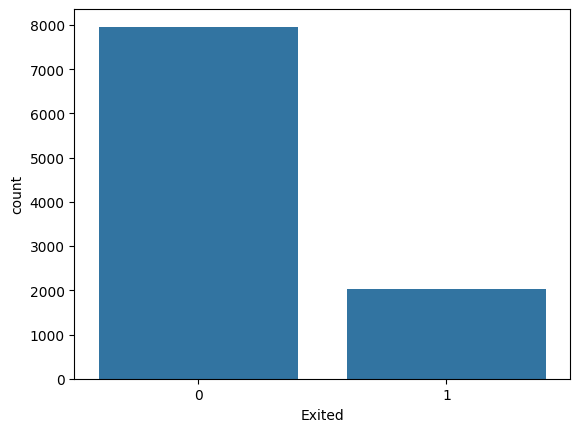

Yüzde:  79.63


In [12]:
# hedef sutuumuz içerisinde ki gözlem sayısını hesaplayalım ve dağılımını kontrol edelim. hemen hemen yarı yarıya olması lazım

oran = df["Exited"].value_counts()
print(oran)

sns.countplot(x="Exited",data=df)
plt.show()


print("Yüzde: ",7963/(2037+7963)*100)


In [14]:
 # X ve y degerlerini olusturalim 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X, y)

In [16]:
# rastgele train/test olarak bolelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [18]:
df.shape

(10000, 13)

In [19]:
# fonksiyondaki parametreleri kendi verinize göre değiştirin

def model_oluştur():

    # Modelimizi oluşturalım
    model = Sequential()
    model.add(Dense(6, input_shape=(12,), activation="relu"))
    model.add(Dense(6, activation="relu"))
    model.add(Dense(3, activation="relu"))
    model.add(Dense(3, activation="relu"))

    # çıktı katmanı
    model.add(Dense(1, activation="sigmoid"))
    
    # Modelimizi derleyelim
    model.compile(optimizer="adam", loss="binary_crossentropy",metrics="accuracy")
  

    return model, X_train, y_train, X_test, y_test

# Modeli oluştur
my_model, X_train, y_train, X_test, y_test = model_oluştur()

In [20]:
# Modeli eğit

earlyStopping = EarlyStopping(monitor="val_loss", mode="min",verbose=0,patience=25)

history = my_model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test),verbose=0,callbacks=[earlyStopping])

# Sadece ilk ve son indekslerin çıktılarını al
print("İlk epoch çıktısı (loss):", history.history['loss'][0])
print("Son epoch çıktısı (loss):", history.history['loss'][-1])

İlk epoch çıktısı (loss): 0.6206374764442444
Son epoch çıktısı (loss): 0.33958885073661804


<Axes: >

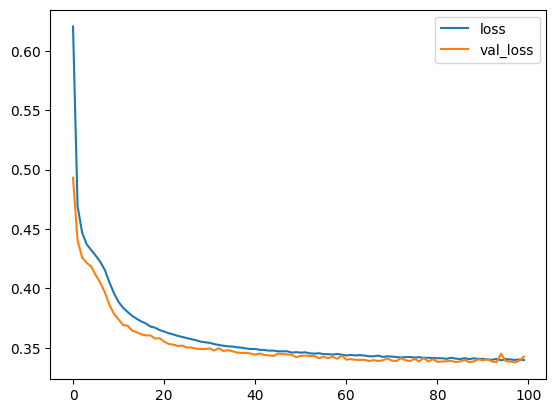

In [21]:
loss = pd.DataFrame(my_model.history.history)

# Loss ve val_loss değerlerini içeren DataFrame'i oluştur
loss_df = pd.DataFrame({'loss': history.history['loss'],'val_loss': history.history['val_loss']})
loss_df.plot()

In [22]:
# kayıp değerleri kontrol edelim. 0 yaklaştıkça daha iyi performan verecektir.

test_loss = my_model.evaluate(X_test, y_test)[0]

train_loss = my_model.evaluate(X_train, y_train)[0]

print("train_set:",train_loss)
print("test_set:",test_loss)

210/210 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8624
train_set: 0.33934953808784485
test_set: 0.3424105644226074


In [23]:
# accuracy değerleri kontrol edelim. 1 yaklaştıkça daha iyi performan verecektir.

test_accuracy = my_model.evaluate(X_test, y_test)[1]

train_accuracy = my_model.evaluate(X_train, y_train)[1]

print("train_set:",train_accuracy)
print("test_set:",test_accuracy)

210/210 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8624
train_set: 0.8623880743980408
test_set: 0.8624242544174194


In [24]:
# Predictionlari olusturalim
y_pred = my_model.predict(X_test)

104/104 [==============================] - 0s 2ms/step


In [25]:
# preds değişkenini kullanarak 0 ve 1 olarak ayarla
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
değerlendirme = classification_report(y_test,y_pred)
print(değerlendirme)

print()

confusionMatrix = confusion_matrix(y_test,y_pred)
confusionMatrix

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.71      0.50      0.58       643

    accuracy                           0.86      3300
   macro avg       0.80      0.72      0.75      3300
weighted avg       0.85      0.86      0.85      3300




array([[2527,  130],
       [ 324,  319]], dtype=int64)

In [27]:
# Yeni bir DataFrame oluştur
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini Sonuçlar"])
y_pred_df.head(3)

,Tahmini Sonuçlar
0,0
1,0
2,0


In [28]:
y_test_df = pd.DataFrame(data=y_test,columns=["Gerçek_Sonuç"])

karsılastırma_df = pd.concat([y_test_df,y_pred_df],axis=1)
karsılastırma_df

,Gerçek_Sonuç,Tahmini Sonuçlar
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3295,0,0
3296,0,0
3297,0,0
3298,0,0
